#**Data Uploading**

In [146]:
#from google.colab import files
#uploaded_train = files.upload()

In [147]:
for fn in uploaded_train.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(name=fn, length=len(uploaded_train[fn])))

User uploaded file "Sapfile1.arff" with length 15825 bytes


In [148]:
from scipy.io import arff
import pandas as pd
import io
data = arff.loadarff(io.StringIO(uploaded_train['Sapfile1.arff'].decode('utf-8')))
df = pd.DataFrame(data[0])

df.head()

,ge,cst,tnp,twp,iap,esp,arr,ms,ls,as,fmi,fs,fq,mq,fo,mo,nf,sh,ss,me,tt,atd
0,b'F',b'G',b'Good',b'Good',b'Vg',b'Good',b'Y',b'Unmarried',b'V',b'Paid',b'Medium',b'Average',b'Um',b'10',b'Farmer',b'Housewife',b'Large',b'Poor',b'Govt',b'Asm',b'Small',b'Good'
1,b'M',b'OBC',b'Vg',b'Vg',b'Vg',b'Vg',b'N',b'Unmarried',b'V',b'Paid',b'Low',b'Average',b'Um',b'Il',b'Service',b'Service',b'Small',b'Poor',b'Govt',b'Asm',b'Average',b'Average'
2,b'F',b'OBC',b'Good',b'Good',b'Vg',b'Good',b'N',b'Unmarried',b'V',b'Paid',b'Am',b'Average',b'12',b'10',b'Service',b'Housewife',b'Average',b'Average',b'Govt',b'Asm',b'Large',b'Good'
3,b'M',b'MOBC',b'Pass',b'Good',b'Vg',b'Good',b'N',b'Unmarried',b'V',b'Paid',b'Medium',b'Small',b'12',b'Um',b'Business',b'Business',b'Large',b'Poor',b'Govt',b'Asm',b'Average',b'Average'
4,b'M',b'G',b'Good',b'Good',b'Vg',b'Vg',b'N',b'Unmarried',b'V',b'Paid',b'Am',b'Average',b'10',b'12',b'Service',b'Housewife',b'Large',b'Poor',b'Private',b'Asm',b'Small',b'Good'


In [149]:
for col in df:
    if col == "Result":
        temp = list(map(lambda x: int(x.decode('UTF-8')),df[col]))
        df[col] = temp
    else:
        temp = list(map(lambda x: x.decode('UTF-8'),df[col]))
        df[col] = temp
        df[col] = pd.Categorical(df[col])

df.head()

,ge,cst,tnp,twp,iap,esp,arr,ms,ls,as,fmi,fs,fq,mq,fo,mo,nf,sh,ss,me,tt,atd
0,F,G,Good,Good,Vg,Good,Y,Unmarried,V,Paid,Medium,Average,Um,10,Farmer,Housewife,Large,Poor,Govt,Asm,Small,Good
1,M,OBC,Vg,Vg,Vg,Vg,N,Unmarried,V,Paid,Low,Average,Um,Il,Service,Service,Small,Poor,Govt,Asm,Average,Average
2,F,OBC,Good,Good,Vg,Good,N,Unmarried,V,Paid,Am,Average,12,10,Service,Housewife,Average,Average,Govt,Asm,Large,Good
3,M,MOBC,Pass,Good,Vg,Good,N,Unmarried,V,Paid,Medium,Small,12,Um,Business,Business,Large,Poor,Govt,Asm,Average,Average
4,M,G,Good,Good,Vg,Vg,N,Unmarried,V,Paid,Am,Average,10,12,Service,Housewife,Large,Poor,Private,Asm,Small,Good


#**Preprocessing**

In [150]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131 entries, 0 to 130
Data columns (total 22 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   ge      131 non-null    category
 1   cst     131 non-null    category
 2   tnp     131 non-null    category
 3   twp     131 non-null    category
 4   iap     131 non-null    category
 5   esp     131 non-null    category
 6   arr     131 non-null    category
 7   ms      131 non-null    category
 8   ls      131 non-null    category
 9   as      131 non-null    category
 10  fmi     131 non-null    category
 11  fs      131 non-null    category
 12  fq      131 non-null    category
 13  mq      131 non-null    category
 14  fo      131 non-null    category
 15  mo      131 non-null    category
 16  nf      131 non-null    category
 17  sh      131 non-null    category
 18  ss      131 non-null    category
 19  me      131 non-null    category
 20  tt      131 non-null    category
 21  atd     131 non-

In [151]:
import numpy as np
np.unique(df['esp'])
df['esp'].value_counts()

Good    54
Vg      42
Pass    27
Best     8
Name: esp, dtype: int64

In [152]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(df["esp"])
y = le.transform(df["esp"])

In [153]:
y.shape

(131,)

In [154]:
print(" number of Best class ",(y==0).sum())
print(" number of Good class ",(y==1).sum())
print(" number of pass class ",(y==2).sum())
print(" number of very good class ",(y==3).sum())
print(np.unique(df['esp']))

 number of Best class  8
 number of Good class  54
 number of pass class  27
 number of very good class  42
['Best' 'Good' 'Pass' 'Vg']


In [155]:
df.drop(columns=["esp"],inplace=True)
df.head(5)

,ge,cst,tnp,twp,iap,arr,ms,ls,as,fmi,fs,fq,mq,fo,mo,nf,sh,ss,me,tt,atd
0,F,G,Good,Good,Vg,Y,Unmarried,V,Paid,Medium,Average,Um,10,Farmer,Housewife,Large,Poor,Govt,Asm,Small,Good
1,M,OBC,Vg,Vg,Vg,N,Unmarried,V,Paid,Low,Average,Um,Il,Service,Service,Small,Poor,Govt,Asm,Average,Average
2,F,OBC,Good,Good,Vg,N,Unmarried,V,Paid,Am,Average,12,10,Service,Housewife,Average,Average,Govt,Asm,Large,Good
3,M,MOBC,Pass,Good,Vg,N,Unmarried,V,Paid,Medium,Small,12,Um,Business,Business,Large,Poor,Govt,Asm,Average,Average
4,M,G,Good,Good,Vg,N,Unmarried,V,Paid,Am,Average,10,12,Service,Housewife,Large,Poor,Private,Asm,Small,Good


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


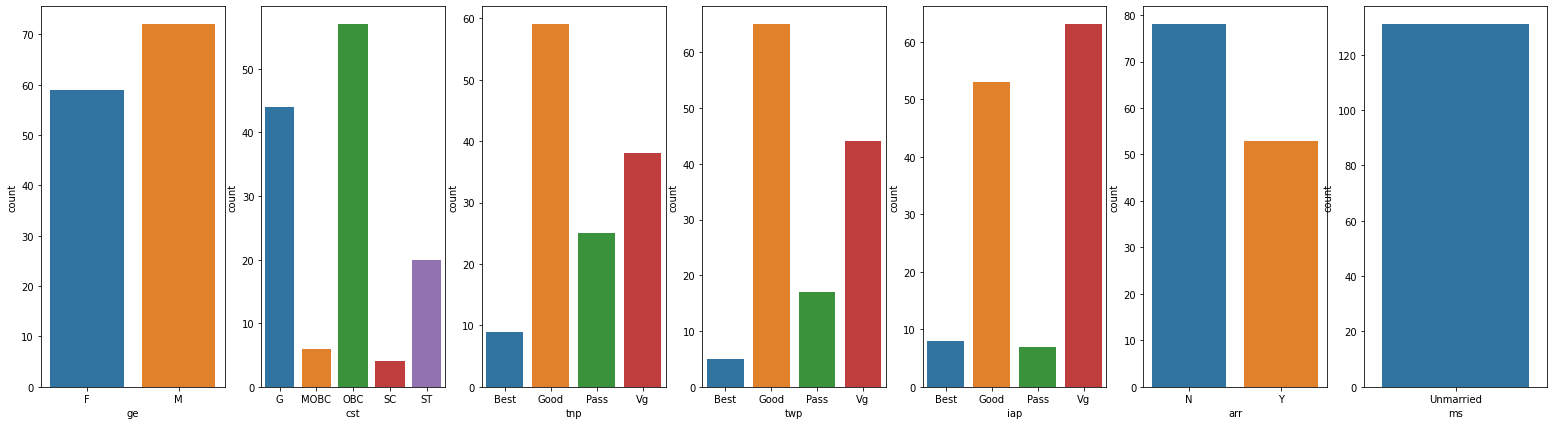

In [156]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, ax =plt.subplots(1,7,figsize=(27,7))
sns.countplot(df['ge'], ax=ax[0])
sns.countplot(df['cst'], ax=ax[1])
sns.countplot(df['tnp'], ax=ax[2])
sns.countplot(df['twp'], ax=ax[3])
sns.countplot(df['iap'], ax=ax[4])
sns.countplot(df['arr'], ax=ax[5])
sns.countplot(df['ms'], ax=ax[6])
fig.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


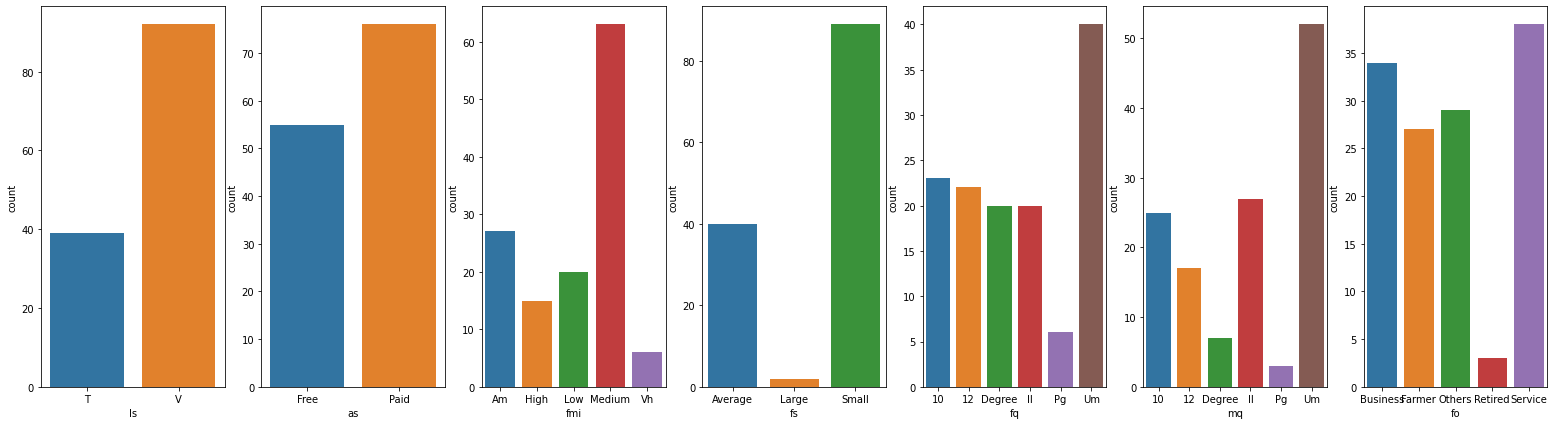

In [157]:
fig, ax =plt.subplots(1,7,figsize=(27,7))
sns.countplot(df['ls'], ax=ax[0])
sns.countplot(df['as'], ax=ax[1])
sns.countplot(df['fmi'], ax=ax[2])
sns.countplot(df['fs'], ax=ax[3])
sns.countplot(df['fq'], ax=ax[4])
sns.countplot(df['mq'], ax=ax[5])
sns.countplot(df['fo'], ax=ax[6])
fig.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


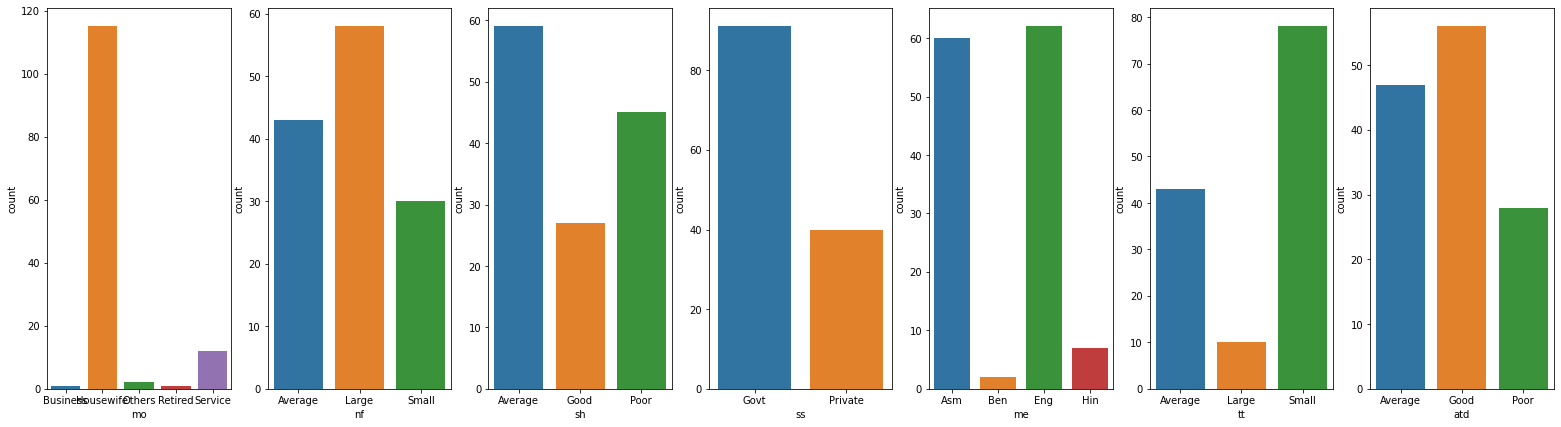

In [158]:
fig, ax =plt.subplots(1,7,figsize=(27,7))
sns.countplot(df['mo'], ax=ax[0], )
sns.countplot(df['nf'], ax=ax[1])
sns.countplot(df['sh'], ax=ax[2])
sns.countplot(df['ss'], ax=ax[3])
sns.countplot(df['me'], ax=ax[4])
sns.countplot(df['tt'], ax=ax[5])
sns.countplot(df['atd'], ax=ax[6])
fig.show()

In [159]:
from sklearn.preprocessing import OneHotEncoder
def encoding(df,col):
  oh = OneHotEncoder(drop = 'first')
  out_val=oh.fit_transform(df[[col]]).toarray()
  out_feature = oh.get_feature_names([col])
  df_new = pd.DataFrame(out_val,columns=[out_feature])
  df_final = pd.concat([df,df_new,],axis=1)
  df_final.drop(columns =[col],inplace=True)
  return df_final

In [160]:
cols = df.columns
cols

Index(['ge', 'cst', 'tnp', 'twp', 'iap', 'arr', 'ms', 'ls', 'as', 'fmi', 'fs',
       'fq', 'mq', 'fo', 'mo', 'nf', 'sh', 'ss', 'me', 'tt', 'atd'],
      dtype='object')

In [161]:
temp = df['cst'].values
temp

['G', 'OBC', 'OBC', 'MOBC', 'G', ..., 'G', 'MOBC', 'OBC', 'ST', 'G']
Length: 131
Categories (5, object): ['G', 'MOBC', 'OBC', 'SC', 'ST']

In [162]:
for col in cols:
  df = encoding(df,col)


In [163]:
df.head(5)

,"(ge_M,)","(cst_MOBC,)","(cst_OBC,)","(cst_SC,)","(cst_ST,)","(tnp_Good,)","(tnp_Pass,)","(tnp_Vg,)","(twp_Good,)","(twp_Pass,)","(twp_Vg,)","(iap_Good,)","(iap_Pass,)","(iap_Vg,)","(arr_Y,)","(ls_V,)","(as_Paid,)","(fmi_High,)","(fmi_Low,)","(fmi_Medium,)","(fmi_Vh,)","(fs_Large,)","(fs_Small,)","(fq_12,)","(fq_Degree,)","(fq_Il,)","(fq_Pg,)","(fq_Um,)","(mq_12,)","(mq_Degree,)","(mq_Il,)","(mq_Pg,)","(mq_Um,)","(fo_Farmer,)","(fo_Others,)","(fo_Retired,)","(fo_Service,)","(mo_Housewife,)","(mo_Others,)","(mo_Retired,)","(mo_Service,)","(nf_Large,)","(nf_Small,)","(sh_Good,)","(sh_Poor,)","(ss_Private,)","(me_Ben,)","(me_Eng,)","(me_Hin,)","(tt_Large,)","(tt_Small,)","(atd_Good,)","(atd_Poor,)"
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


#**Modelling**

In [164]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(df,y,test_size=0.3,random_state=0)

In [165]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(x_train)
x_train_std=sc.transform(x_train)
x_test_std=sc.transform(x_test)

##KNN Pediction##

In [166]:
from sklearn.neighbors import KNeighborsClassifier
clf1=KNeighborsClassifier(n_neighbors=3)
clf1.fit(x_train,y_train)
y_pred_train=clf1.predict(x_train)
y_pred_test1=clf1.predict(x_test)

In [167]:
from sklearn.metrics import accuracy_score
train_acc=accuracy_score(y_train,y_pred_train)
test_acc=accuracy_score(y_test,y_pred_test1)
print('Training Accuracy: ',train_acc)
print('Testing Accuracy: ',test_acc)

Training Accuracy:  0.7362637362637363
Testing Accuracy:  0.525


##SVC Pediction##

In [168]:
from sklearn.svm import SVC
clf2=SVC(C=1,kernel='rbf')
clf2.fit(x_train,y_train)
y_pred_train=clf2.predict(x_train)
y_pred_test2=clf2.predict(x_test)

In [169]:
train_acc=accuracy_score(y_train,y_pred_train)
test_acc=accuracy_score(y_test,y_pred_test2)
print('Training Accuracy: ',train_acc)
print('Testing Accuracy: ',test_acc)

Training Accuracy:  0.8901098901098901
Testing Accuracy:  0.525


##Random Forest Pediction##

In [170]:
from sklearn.ensemble import RandomForestClassifier
clf3=RandomForestClassifier(n_estimators=100,max_depth=5)
clf3.fit(x_train,y_train)
y_pred_train=clf3.predict(x_train)
y_pred_test3=clf3.predict(x_test)

In [171]:
train_acc=accuracy_score(y_train,y_pred_train)
test_acc=accuracy_score(y_test,y_pred_test3)
print('Training Accuracy: ',train_acc)
print('Testing Accuracy: ',test_acc)

Training Accuracy:  0.9340659340659341
Testing Accuracy:  0.525


##Evaluated score by cross-validation##

In [172]:
from sklearn.model_selection import cross_val_score
import time

In [173]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
start = time.time()
cross_knn = cross_val_score(knn,df.values,y,cv=3)
end = time.time()
print(cross_knn)
print('Execution time of knn:           ',end-start)
print('Mean validation accuracy of knn: ',(cross_knn.sum())/3)

[0.5        0.45454545 0.62790698]
Execution time of knn:            0.01347661018371582
Mean validation accuracy of knn:  0.5274841437632135


In [174]:
from sklearn.svm import SVC
svm_obj = SVC()  
start = time.time()
cross_svm = cross_val_score(svm_obj,df.values,y.ravel(),cv=3)
end = time.time()
print(cross_svm)
print('Execution time of svm:           ',end-start)
print('Mean validation accuracy of svm: ',(cross_svm.sum())/3)

[0.5        0.52272727 0.62790698]
Execution time of svm:            0.01358938217163086
Mean validation accuracy of svm:  0.5502114164904862


In [175]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
start = time.time()
cross_rfc = cross_val_score(rfc,df.values,y,cv=3)
end = time.time()
print(cross_rfc)
print('Execution time of knn:           ',end-start)
print('Mean validation accuracy of knn: ',(cross_rfc.sum())/3)

[0.52272727 0.52272727 0.62790698]
Execution time of knn:            0.5270061492919922
Mean validation accuracy of knn:  0.5577871740662438


#**Hyperparemeter Tuning**

In [176]:
from sklearn.model_selection import RandomizedSearchCV

In [193]:
########### KNN #############
param_knn = {
    'n_neighbors': list(range(1,10)),
    'leaf_size' : list(range(1,10)),
    'p': [1,2]
}

In [195]:
model_tuned_knn = RandomizedSearchCV(knn,param_knn,cv=3)
model_tuned_knn.fit(x_train,y_train)

RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=KNeighborsClassifier(algorithm='auto',
                                                  leaf_size=30,
                                                  metric='minkowski',
                                                  metric_params=None,
                                                  n_jobs=None, n_neighbors=5,
                                                  p=2, weights='uniform'),
                   iid='deprecated', n_iter=10, n_jobs=None,
                   param_distributions={'leaf_size': [1, 2, 3, 4, 5, 6, 7, 8,
                                                      9],
                                        'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8,
                                                        9],
                                        'p': [1, 2]},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=False, scoring=None, verbose=

In [196]:
print(model_tuned_knn.best_params_)
print('mean vald accuracy ',model_tuned_knn.best_score_)

{'p': 2, 'n_neighbors': 8, 'leaf_size': 4}
mean vald accuracy  0.6483870967741935


In [197]:
model_tuned_knn = RandomizedSearchCV(knn,param_knn,cv=3)
model_tuned_knn.fit(x_test,y_test)
print(model_tuned_knn.best_params_)
print('mean vald accuracy ',model_tuned_knn.best_score_)

{'p': 2, 'n_neighbors': 3, 'leaf_size': 2}
mean vald accuracy  0.553113553113553


In [199]:
########### SVC #############
param_svm = {
    'C': [0.05,0.1,0.5,1,2,3,5,10],
    'kernel' : ['linear','poly','rbf','sigmoid'],
    'gamma': ['scale','auto']
}

In [205]:
model_tuned_svm = RandomizedSearchCV(svm_obj,param_svm,cv=3,random_state=42)
model_tuned_svm.fit(x_train,y_train)

RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                                 class_weight=None, coef0=0.0,
                                 decision_function_shape='ovr', degree=3,
                                 gamma='scale', kernel='rbf', max_iter=-1,
                                 probability=False, random_state=None,
                                 shrinking=True, tol=0.001, verbose=False),
                   iid='deprecated', n_iter=10, n_jobs=None,
                   param_distributions={'C': [0.05, 0.1, 0.5, 1, 2, 3, 5, 10],
                                        'gamma': ['scale', 'auto'],
                                        'kernel': ['linear', 'poly', 'rbf',
                                                   'sigmoid']},
                   pre_dispatch='2*n_jobs', random_state=42, refit=True,
                   return_train_score=False, scoring=None, verbose=0)

In [206]:
print(model_tuned_svm.best_params_)
print('mean vald accuracy of SVM ',model_tuned_svm.best_score_)

{'kernel': 'linear', 'gamma': 'auto', 'C': 0.1}
mean vald accuracy of SVM  0.6598566308243727


In [207]:
model_tuned_svm = RandomizedSearchCV(svm_obj,param_svm,cv=3,random_state=42)
model_tuned_svm.fit(x_test,y_test)
print(model_tuned_svm.best_params_)
print('mean vald accuracy of SVM ',model_tuned_svm.best_score_)

{'kernel': 'linear', 'gamma': 'auto', 'C': 0.1}
mean vald accuracy of SVM  0.5036630036630036


In [183]:
########### RFC #############
param_rfc = {
    'n_estimators': [10,50,100,150,200],
    'max_features' : ['auto', 'sqrt'],
    'max_depth': [5,10,15]
}

In [209]:
model_tuned_rfc = RandomizedSearchCV(rfc,param_rfc,cv=3,random_state=42)
model_tuned_rfc.fit(x_train,y_train)

RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [210]:
print(model_tuned_rfc.best_params_)
print('mean vald accuracy of Random Forest ',model_tuned_rfc.best_score_)

{'n_estimators': 150, 'max_features': 'sqrt', 'max_depth': 5}
mean vald accuracy of Random Forest  0.6924731182795698


In [211]:
model_tuned_rfc = RandomizedSearchCV(rfc,param_rfc,cv=3,random_state=42)
model_tuned_rfc.fit(x_test,y_test)
print(model_tuned_rfc.best_params_)
print('mean vald accuracy of Random Forest ',model_tuned_rfc.best_score_)

{'n_estimators': 150, 'max_features': 'auto', 'max_depth': 15}
mean vald accuracy of Random Forest  0.576923076923077


#**CONFUSION MATRIX**#

In [186]:
from sklearn.metrics import plot_confusion_matrix

In [187]:
from sklearn.metrics import classification_report
cr=classification_report(y_test,y_pred_test1)
print(cr)

              precision    recall  f1-score   support

           0       0.50      0.50      0.50         4
           1       0.53      0.59      0.56        17
           2       0.50      0.67      0.57         6
           3       0.56      0.38      0.45        13

    accuracy                           0.53        40
   macro avg       0.52      0.53      0.52        40
weighted avg       0.53      0.53      0.52        40



confusion matrix for KNN


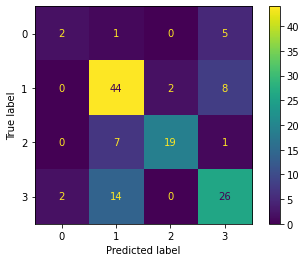

In [188]:
print("confusion matrix for KNN")
plot_confusion_matrix(model_tuned_knn,df.values,y.ravel())

In [189]:
cr=classification_report(y_test,y_pred_test2)
print(cr)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.54      0.76      0.63        17
           2       1.00      0.33      0.50         6
           3       0.43      0.46      0.44        13

    accuracy                           0.53        40
   macro avg       0.49      0.39      0.39        40
weighted avg       0.52      0.53      0.49        40



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


confusion matrix for SVM


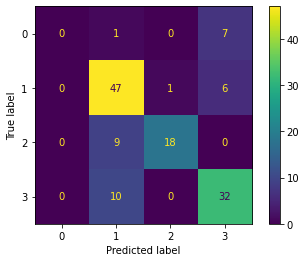

In [190]:
print("confusion matrix for SVM")
plot_confusion_matrix(model_tuned_svm,df.values,y.ravel())

In [191]:
cr=classification_report(y_test,y_pred_test3)
print(cr)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.54      0.76      0.63        17
           2       1.00      0.17      0.29         6
           3       0.47      0.54      0.50        13

    accuracy                           0.53        40
   macro avg       0.50      0.37      0.35        40
weighted avg       0.53      0.53      0.47        40



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


confusion matrix for RF


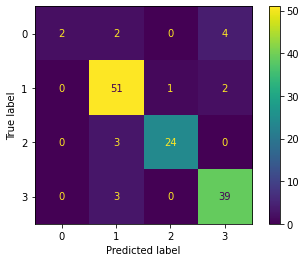

In [192]:
print("confusion matrix for RF")
plot_confusion_matrix(model_tuned_rfc,df.values,y.ravel())